In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [25]:
data = pd.read_csv('A_Z Handwritten Data.csv')

***Renaming pixels***

In [26]:
data.columns = ['label'] + [f'pixel_{i}' for i in range(784)]

# *Quick peek on data*

In [27]:
data.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 372450 entries, 0 to 372449

Columns: 785 entries, label to pixel_783

dtypes: int64(785)

memory usage: 2.2 GB


In [29]:
data.shape

(372450, 785)

In [30]:
Y = data.label
X = data.drop('label', axis=1)

In [31]:
Y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

*26 unique value [A-Z]*

In [32]:
letters =[chr(i) for i in range(65, 91)]
letters 

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

<BarContainer object of 26 artists>

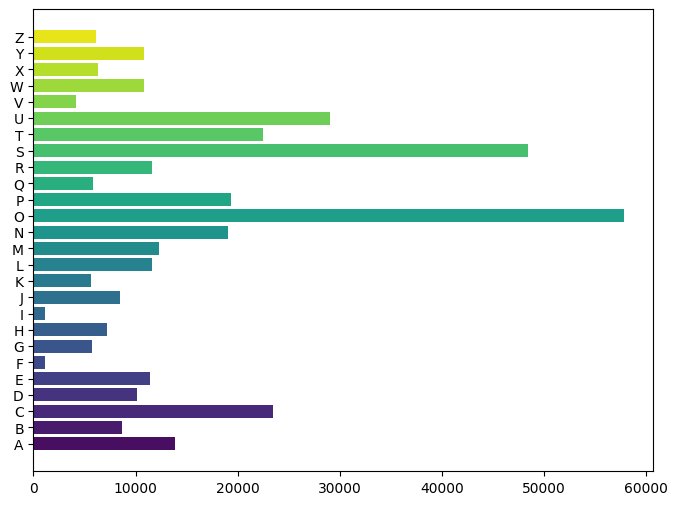

In [33]:
plt.figure(figsize=(8, 6))
plt.barh(letters, Y.value_counts().sort_index(), color=sns.color_palette('viridis', 26))

*The occurrence of O,S is high
while the occurrence of I,F is pretty low*

# *Visualizing random set of letters*

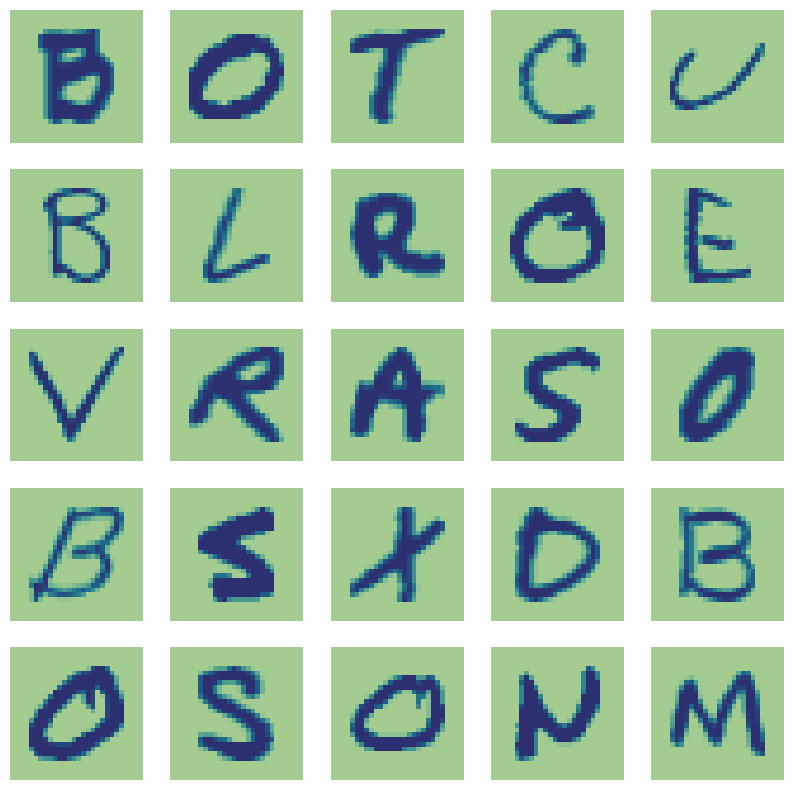

In [34]:
random_indices = np.random.choice(range(len(X)), size=25, replace=False)
_, axes = plt.subplots(5, 5, figsize=(10, 10))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(X.iloc[random_indices[i]].values.reshape(28, 28), cmap='crest')
    ax.axis('off')
plt.show()

***Splitting into train,test***

In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
x_train.shape, x_test.shape,

((260715, 784), (111735, 784))

# *Important tips for implementing neural networks:*
* **Input layer shape should be (X.shape[1],)(features,)**
* **Final layer should be the number of the classes you have**
* **If you have more than two classes, it's generally recommended to use the softmax activation function in the final layer. This ensures that the model's output represents a valid probability distribution over all classes.(if two use sigmoid)**
* **Better approach is to use linear function as your activation function for the final layer as it returns logits(not probabilities) so it's more accurate cause it avoids(approximation)(remember to set loss=SparseCategoricalCrossentropy(from_logits=True) to let your model know that the last layer returns logits not probabilities)**

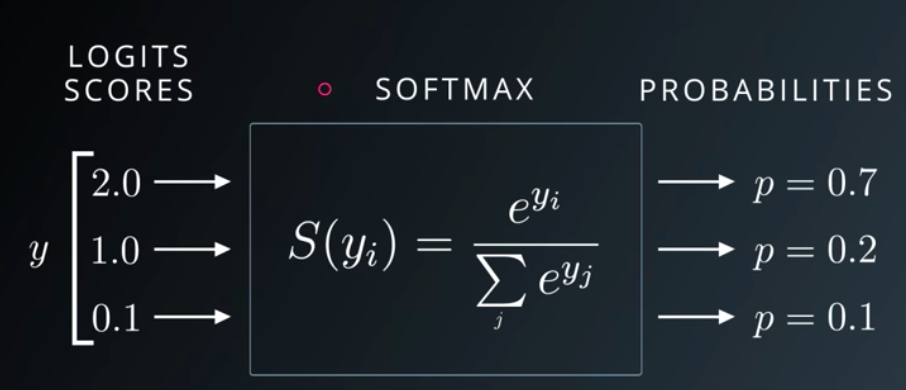

# *✨Model✨*

In [36]:
model = Sequential()
model.add(InputLayer(shape=(x_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(26, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,426 (431.35 KB)

 Trainable params: 110,426 (431.35 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.5129 - loss: 9.7942 - val_accuracy: 0.8090 - val_loss: 0.7685

Epoch 2/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.8405 - loss: 0.6214 - val_accuracy: 0.8861 - val_loss: 0.4265

Epoch 3/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9028 - loss: 0.3555 - val_accuracy: 0.9226 - val_loss: 0.2965

Epoch 4/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9328 - loss: 0.2445 - val_accuracy: 0.9368 - val_loss: 0.2423

Epoch 5/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.9460 - loss: 0.1908 - val_accuracy: 0.9467 - val_loss: 0.2024

Epoch 6/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9550 - loss: 0.1593 - val_accuracy: 0.9479 - val_loss: 0.1944

Epoch 7/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9609 - loss: 0.1372 - val_accuracy: 0.9573 - val_loss: 0.1644

Epoch 8/10

8148/8148 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0

# *Plotting history*
* **histoy has this set of keys (['loss', 'accuracy', 'val_loss', 'val_accuracy'])**


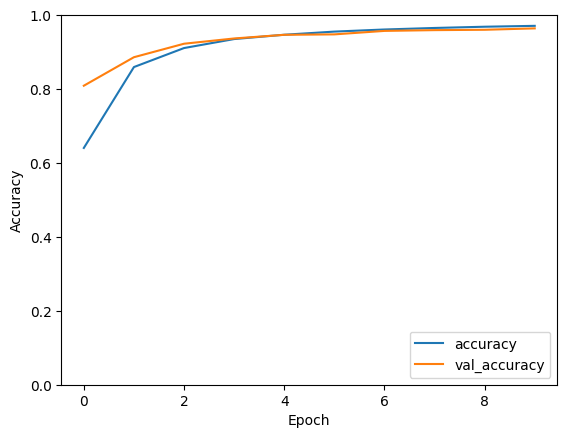

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

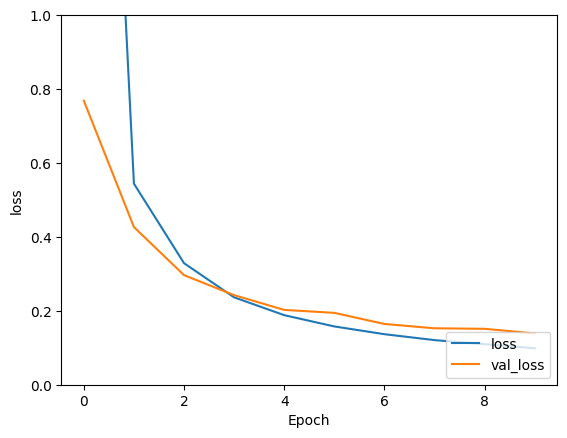

In [39]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


***Check the accuracy***

In [47]:
_,test_acc = model.evaluate(x_test, y_test)
print(f'Accuracy: {test_acc}')

3492/3492 ━━━━━━━━━━━━━━━━━━━━ 3s 982us/step - accuracy: 0.9639 - loss: 0.1372

Accuracy: 0.964138388633728


In [48]:
z = model.predict(x_test)

3492/3492 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


***z (not probability) witch is y in the formula above***

In [49]:
print(z[0])

[ 26.624447    18.676832     9.323257     8.786962    14.375504

  -7.6984124   11.646714    19.083256   -78.575        0.23962088

  12.593962    -2.2325184   14.729343    17.63103     12.929539

  17.798412    13.950842    20.51359     15.736777    10.153003

   1.365579   -53.832153     6.9129667    1.2502418   -0.81993777

  -8.172629  ]


***Calculating the probability using softmax***

In [50]:
prediction = tf.nn.softmax(z)
print(prediction[0])

tf.Tensor(

[9.96601820e-01 3.52303148e-04 3.05288594e-08 1.78566442e-08

 4.77389904e-06 1.23678065e-15 3.11727490e-07 5.28961420e-04

 0.00000000e+00 3.46526995e-12 8.03821081e-07 2.92482997e-13

 6.80054700e-06 1.23802660e-04 1.12434248e-06 1.46360384e-04

 3.12208658e-06 2.21110904e-03 1.86237376e-05 6.99946412e-08

 1.06840292e-11 1.13936426e-35 2.74116441e-09 9.52016938e-12

 1.20109272e-12 7.69738279e-16], shape=(26,), dtype=float32)


***To get the predicted class use argmax() it returns the index of the largest value***

In [51]:
prediction = np.argmax(prediction, axis=1)
prediction

array([ 0, 18, 15, ..., 19,  3, 10], dtype=int64)

In [52]:
wrong_predictions = np.where(prediction != y_test)[0]
wrong_predictions.shape

(4007,)

# *Visualizing random set of wrong predictions*

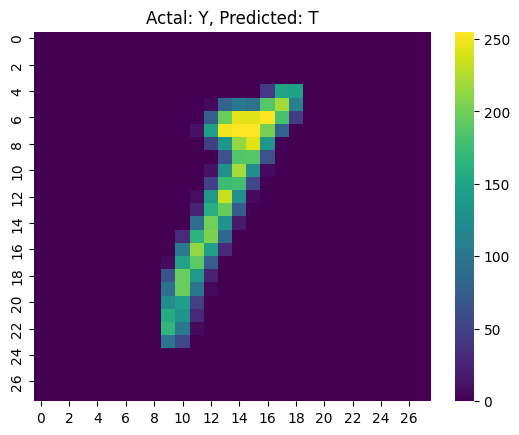

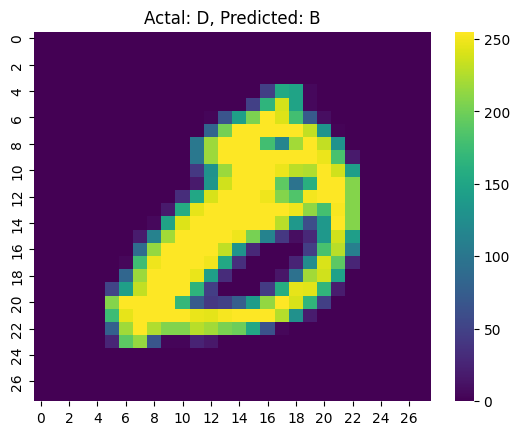

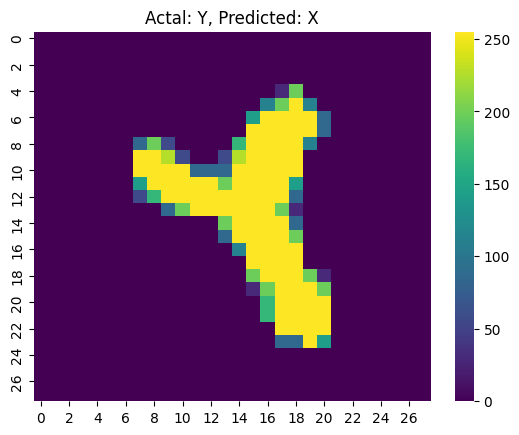

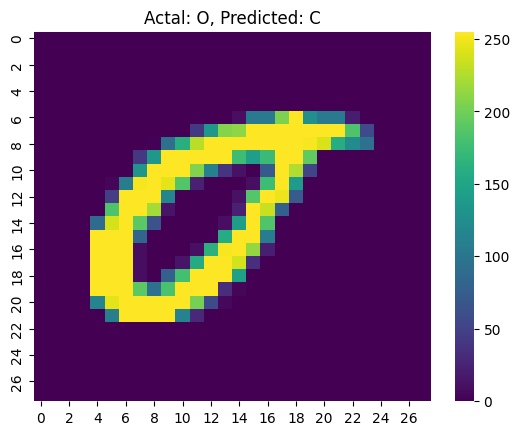

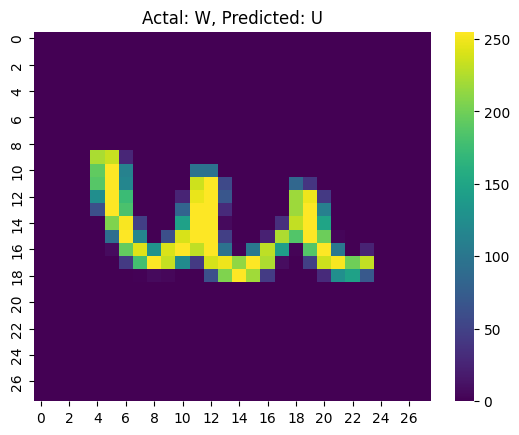

In [53]:
for i in range(5):
    sns.heatmap(x_test.iloc[wrong_predictions[i]].values.reshape(28, 28), cmap='viridis')
    plt.title(f'Actal: {chr(y_test.iloc[wrong_predictions[i]]+65)}, Predicted: {chr(prediction[wrong_predictions[i]]+65)}')
    plt.show()